<a href="https://colab.research.google.com/github/Krykiet/TF_training/blob/main/03_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Data
Two classes from Food101 dataset, starting with smaller dataset to make experiments quicker.

### Inspect data

In [1]:
!ls /content/drive/MyDrive/pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

### Count files

In [2]:
DIR = "/content/drive/MyDrive/pizza_steak"

In [3]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/drive/MyDrive/pizza_steak
There are 2 directories and 0 images in /content/drive/MyDrive/pizza_steak/test
There are 0 directories and 250 images in /content/drive/MyDrive/pizza_steak/test/steak
There are 0 directories and 250 images in /content/drive/MyDrive/pizza_steak/test/pizza
There are 2 directories and 0 images in /content/drive/MyDrive/pizza_steak/train
There are 0 directories and 750 images in /content/drive/MyDrive/pizza_steak/train/steak
There are 0 directories and 750 images in /content/drive/MyDrive/pizza_steak/train/pizza


In [4]:
# Another way to count files
num_steak_images_train = len(os.listdir(DIR+"/train/steak"))
num_steak_images_train

750

In [6]:
# Get classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(DIR+"/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names) # if .DS_store: add class_names[1:]


['pizza' 'steak']


In [7]:
# Display images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir+"/"+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(f"Image name: {random_image}")

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [8]:
# Train and test directories
TRAIN_DIR = DIR + "/train"
TEST_DIR = DIR + "/test"

Image name: ['1567554.jpg']
Image shape: (512, 512, 3)


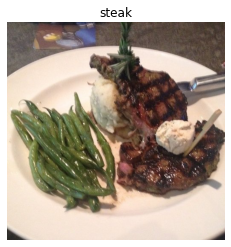

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir=TRAIN_DIR,
                        target_class="steak")

In [10]:
import tensorflow as tf

In [11]:
type(img)

numpy.ndarray

In [12]:
# Image shape
img.shape # width, height, colour channels

(512, 512, 3)

In [13]:
# Image is an numpy array, turning it into tensorflow tensor
img_tensor = tf.constant(img)

In [14]:
tf.reduce_max(img_tensor)

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

In [15]:
tf.cast(img_tensor, tf.float32)

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[87., 81., 81.],
        [89., 83., 83.],
        [96., 91., 88.],
        ...,
        [64., 52., 40.],
        [68., 56., 44.],
        [66., 53., 44.]],

       [[83., 78., 75.],
        [86., 81., 78.],
        [93., 88., 85.],
        ...,
        [66., 54., 42.],
        [71., 59., 47.],
        [69., 56., 47.]],

       [[91., 86., 83.],
        [90., 85., 82.],
        [93., 88., 85.],
        ...,
        [67., 55., 43.],
        [70., 57., 48.],
        [69., 56., 47.]],

       ...,

       [[44., 43., 38.],
        [45., 44., 39.],
        [45., 44., 39.],
        ...,
        [35., 33., 38.],
        [35., 33., 38.],
        [34., 32., 37.]],

       [[43., 40., 33.],
        [45., 42., 37.],
        [47., 44., 39.],
        ...,
        [36., 34., 39.],
        [35., 33., 38.],
        [36., 31., 37.]],

       [[46., 43., 36.],
        [48., 45., 38.],
        [50., 47., 42.],
        ...,
        [38., 36., 

In [16]:
img_tensor_norm = tf.cast(img_tensor, tf.float32)/255.
img_tensor_norm

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.34117648, 0.31764707, 0.31764707],
        [0.34901962, 0.3254902 , 0.3254902 ],
        [0.3764706 , 0.35686275, 0.34509805],
        ...,
        [0.2509804 , 0.20392157, 0.15686275],
        [0.26666668, 0.21960784, 0.17254902],
        [0.25882354, 0.20784314, 0.17254902]],

       [[0.3254902 , 0.30588236, 0.29411766],
        [0.3372549 , 0.31764707, 0.30588236],
        [0.3647059 , 0.34509805, 0.33333334],
        ...,
        [0.25882354, 0.21176471, 0.16470589],
        [0.2784314 , 0.23137255, 0.18431373],
        [0.27058825, 0.21960784, 0.18431373]],

       [[0.35686275, 0.3372549 , 0.3254902 ],
        [0.3529412 , 0.33333334, 0.32156864],
        [0.3647059 , 0.34509805, 0.33333334],
        ...,
        [0.2627451 , 0.21568628, 0.16862746],
        [0.27450982, 0.22352941, 0.1882353 ],
        [0.27058825, 0.21960784, 0.18431373]],

       ...,

       [[0.17254902, 0.16862746, 0.14901961],
        [0.17

## Building model

* Load images
* Preprocess images
* Build a CNN
* Compile CNN
* Fit the CNN to our training data

In [17]:
TEST_DIR, TRAIN_DIR

('/content/drive/MyDrive/pizza_steak/test',
 '/content/drive/MyDrive/pizza_steak/train')

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocessing data (normalizing values)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths
# done before: TEST_DIR, TRAIN_DIR

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=TRAIN_DIR,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=TEST_DIR,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
# Batches number
len(train_data), len(valid_data)

(47, 16)

In [20]:
# CNN model (same as the Tiny VGG on the CNN explainer)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit, we can pass data direcyle from ImageDataGenerator
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 591s 12s/step - loss: 0.5548 - accuracy: 0.7020 - val_loss: 0.3863 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 12s 260ms/step - loss: 0.4111 - accuracy: 0.8093 - val_loss: 0.3445 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 12s 260ms/step - loss: 0.3781 - accuracy: 0.8440 - val_loss: 0.3113 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 12s 259ms/step - loss: 0.3527 - accuracy: 0.8467 - val_loss: 0.3471 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 12s 260ms/step - loss: 0.3193 - accuracy: 0.8553 - val_loss: 0.3220 - val_accuracy: 0.8720


In [21]:
len(train_data)

47